In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
res = pd.DataFrame.from_csv('gobp_clustering.tsv', sep='\t', index_col=None)

In [49]:
print res.cluster_alg.unique()

['None' 'Louvain' 'Greedy Modularity' 'Infomap' 'Leading Eigenvector'
 'Label Propagation' 'Spinglass' 'Walkttrap']


In [16]:
cutoff_order = ["Cutoff(%d)" % s for s in 5,10,20]
KNN_order = ["KNN(%d)" % s for s in 10,50,100,250,500,1000]
transform_order= cutoff_order + KNN_order + ['Cosine', 'Pearson', 'Spearman', 'Topological Overlap', 'Log', 'None']

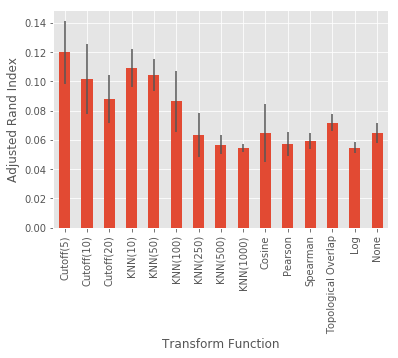

In [46]:
f = res[(res.cluster_alg == 'Louvain') & (res.test_case == 'GO BP 1000 large')]

f = f.groupby(['transform'], as_index=False).agg({'adjusted_rand':[np.mean, np.std]})#[transform_order]

f = f.pivot_table(columns='transform', values='adjusted_rand')[transform_order].transpose()
f.plot(kind='bar', y='mean', yerr='std', legend=False)
plt.xlabel("Transform Function")
plt.ylabel("Adjusted Rand Index")
plt.show()

In [47]:
def plot_metric_for_algorithm(algorithm, test_case, metric):
    f = res[(res.cluster_alg == algorithm) & (res.test_case == test_case)]
    f = f.groupby(['transform'], as_index=False).agg({metric:[np.mean, np.std]})#[transform_order]
    f = f.pivot_table(columns='transform', values=metric)[transform_order].transpose()
    f.plot(kind='bar', y='mean', yerr='std', legend=False)


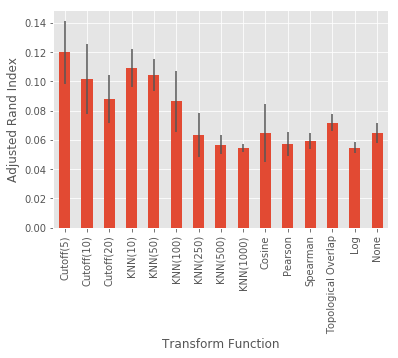

In [61]:
plot_metric_for_algorithm('Louvain', 'GO BP 1000 large', 'adjusted_rand')
plt.xlabel("Transform")
plt.ylabel("Adjusted Rand Index")
plt.show()

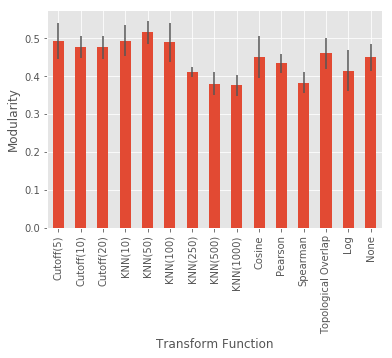

In [62]:
plot_metric_for_algorithm('Louvain', 'GO BP 1000 large', 'modularity_cutoff')
plt.xlabel("Transform Function")
plt.ylabel("Modularity")
plt.show()

In [66]:
res.cluster_alg[res.test_case=='GO BP 1000 large'].unique()

array(['None', 'Louvain', 'Greedy Modularity', 'Leading Eigenvector',
       'Label Propagation', 'Walkttrap'], dtype=object)

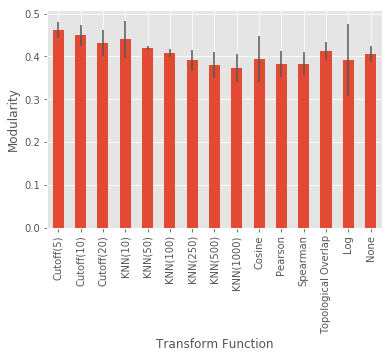

In [79]:
plot_metric_for_algorithm('Greedy Modularity', 'GO BP 1000 large', 'modularity_cutoff')
plt.xlabel("Transform Function")
plt.ylabel("Modularity")
plt.show()